# Batch ETL Pipeline and Task Scheduler Orchestration (On-Premise)

## Notes

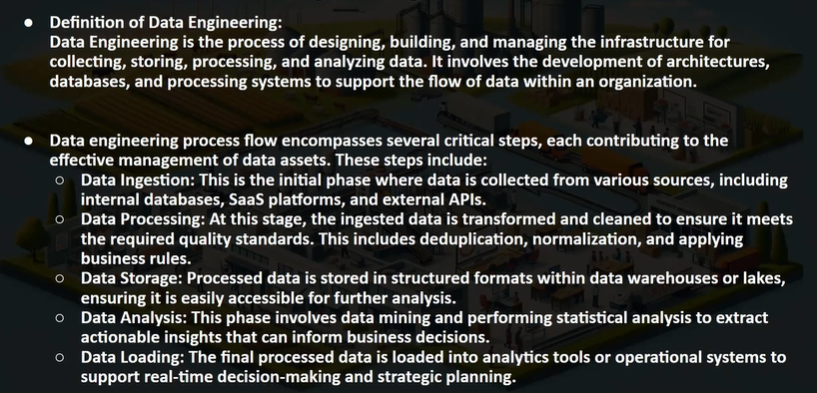

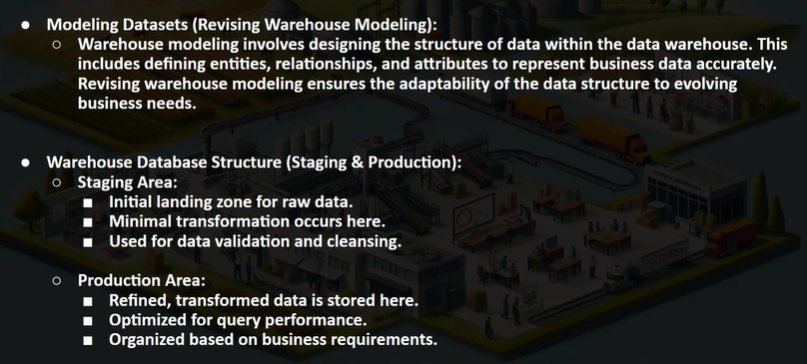

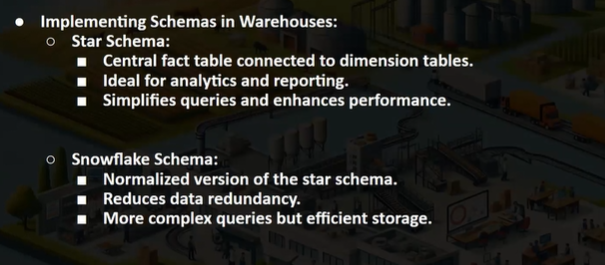

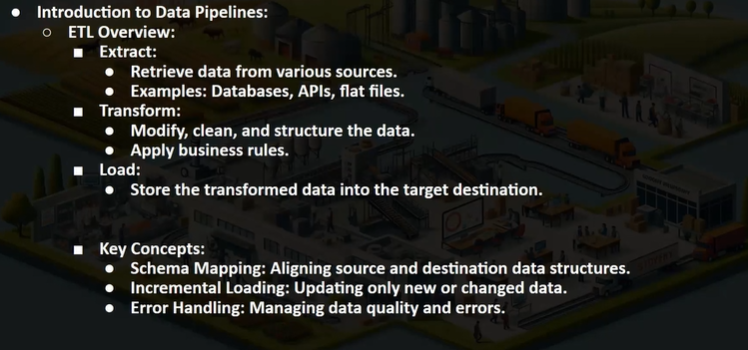

In [9]:
from IPython.display import Image, display
display(Image("images/de_process_flow.png"))
display(Image("images/staging.png"))
display(Image("images/schematypes.png"))
display(Image("images/datapipeline.png"))

## Case Study - On-Premises

### Dataset & Data Architecture
- [Azure: zikologistics dataset]("https://drive.google.com/file/d/1O-wEH1FYyeAE3hygOUjmso0GgaOIsAVm/view?usp=drive_link")
- [Spark: nugabank dataset]("https://drive.google.com/file/d/1bHbh1M5cExdzwhzSaHNUVz3s9Jxtm2E5/view?usp=sharing)

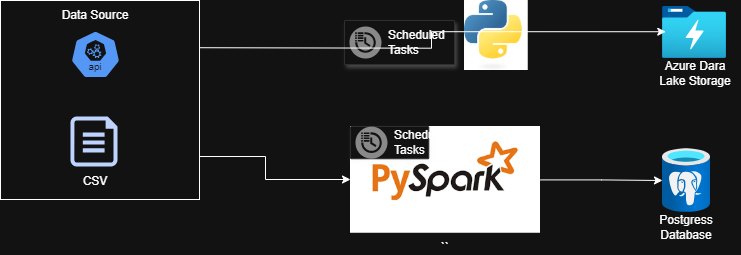

In [14]:
display(Image("images/data architecture.png"))

### Libraries and Dependencies

In [1]:
# Import necessary dependencies
import pandas as pd
import gdown
import tempfile
import shutil
import os
from dotenv import load_dotenv
load_dotenv()
#import psycopg2
from psycopg2 import sql
from sqlalchemy import create_engine, Column, Integer, String, Float, BigInteger, Text, TIMESTAMP, ForeignKey, MetaData, Table

### Extraction Layer
- Download CSV content from Google Drive into a temporary file path 

In [6]:
with tempfile.NamedTemporaryFile(delete=False, suffix=".csv") as tmp:
    temp_path = tmp.name

file_id = "1O-wEH1FYyeAE3hygOUjmso0GgaOIsAVm"
gdown.download(f"https://drive.google.com/uc?id={file_id}", temp_path, quiet=False)
#shutil.copy(temp_path, "ziko_logistics.csv") # Save a permanent copy of the downloaded CSV

ziko_df = pd.read_csv(temp_path)
display(ziko_df.head(3))

# Clean up the temporary file
os.remove(temp_path)

Downloading...
From: https://drive.google.com/uc?id=1O-wEH1FYyeAE3hygOUjmso0GgaOIsAVm
To: C:\Users\Probook\AppData\Local\Temp\tmp12qtsefb.csv
100%|██████████| 267k/267k [00:00<00:00, 2.71MB/s]


,Transaction_ID,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Total_Cost,Discount_Rate,Sales_Channel,Order_Priority,...,Return_Reason,Payment_Type,Taxable,Region,Country,Customer_Name,Customer_Phone,Customer_Email,Customer_Address,Product_List_Title
0,200,2020-01-01 20:32:25.945945945,1086,536,3,120.436821,8265.374549,0.20,Online,High,...,Wrong Item,Wire Transfer,False,West,Canada,Customer 200,+1-652-572-9306,customer.200.78@example.com,"275 Second St, Phoenix, USA",Product 53
1,321,2020-01-02 06:55:08.108108108,1078,523,6,475.724994,4047.850479,NaN,Reseller,Critical,...,Damaged,PayPal,True,South,Mexico,Customer 321,+1-311-186-5760,customer.321.13@sample.com,"478 Third St, New York, USA",Product 33
2,989,2020-01-06 08:12:58.378378378,1077,535,3,146.400556,NaN,0.05,Direct,Critical,...,Damaged,PayPal,True,West,Canada,Customer 989,+1-922-606-9032,customer.989.99@example.com,"843 Second St, Phoenix, USA",Product 6


### Transformation Layer

In [12]:
display(ziko_df.info())
print(ziko_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Transaction_ID         1005 non-null   int64  
 1   Date                   1005 non-null   object 
 2   Customer_ID            1005 non-null   int64  
 3   Product_ID             1005 non-null   int64  
 4   Quantity               1005 non-null   int64  
 5   Unit_Price             904 non-null    float64
 6   Total_Cost             905 non-null    float64
 7   Discount_Rate          714 non-null    float64
 8   Sales_Channel          1005 non-null   object 
 9   Order_Priority         1005 non-null   object 
 10  Warehouse_Code         1005 non-null   object 
 11  Ship_Mode              1005 non-null   object 
 12  Delivery_Status        1005 non-null   object 
 13  Customer_Satisfaction  1005 non-null   object 
 14  Item_Returned          1005 non-null   bool   
 15  Retu

None

Index(['Transaction_ID', 'Date', 'Customer_ID', 'Product_ID', 'Quantity',
       'Unit_Price', 'Total_Cost', 'Discount_Rate', 'Sales_Channel',
       'Order_Priority', 'Warehouse_Code', 'Ship_Mode', 'Delivery_Status',
       'Customer_Satisfaction', 'Item_Returned', 'Return_Reason',
       'Payment_Type', 'Taxable', 'Region', 'Country', 'Customer_Name',
       'Customer_Phone', 'Customer_Email', 'Customer_Address',
       'Product_List_Title'],
      dtype='object')
